In [55]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [56]:
# Для выполнения задания используется один из df, который мы рассматривали ранее. 
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [57]:
# Выведем таблицу. При прочтении источников про тест Шапиро-Уитни я заметила, что его чаще рекомендуют использовать для малых выборок (до 50), но в целом допустимо и для выборок до 2000 значений. 
#Данный датасет соответствует этому критерию.
pd.options.display.max_columns = 999
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Shapiro-Wilk test for normality: ShapiroResult(statistic=0.9774481654167175, pvalue=2.0352736355522087e-14)


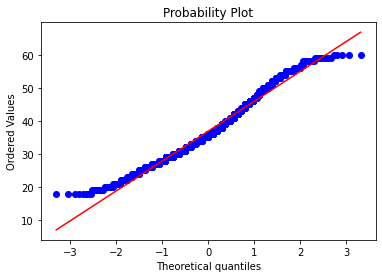

In [80]:
# При изучении источников я заметила, что вместе с тестом Шапиро-Уилка часто строят pp-plot или qq-plot, которые позволяют качественно оценить распределение.
data = df_hr['Age']
stats.probplot(data, dist="norm", plot=plt)
print("Shapiro-Wilk test for normality:", stats.shapiro(data))
plt.show()
# p-value должно быть больше 0,05, чтобы гипотеза о происхождении данных из нормального распределения была принята.
# В данном случае мы видим, что полученное значение 2.0352736355522087e-14 < 0,05, значит гипотеза не принимается.
# О том, что распределение отличается от нормального свидетельствует и график, поскольку видны значительные отклонения от красной линии.

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

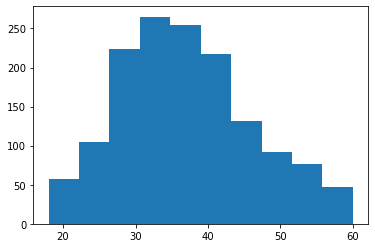

In [78]:
# Просто из интереса построим привычный для нас график. Интересно, что тут по форме распредление напоминает нормальное.
plt.hist(df_hr['Age'])